In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np

# Reading the Dataset

In [3]:
data_frame=pd.read_csv("Dataset/AllProductReviews-change.csv")

In [4]:
data_frame.head()

,ID,ReviewTitle,ReviewBody,ReviewStar,Product
0,1,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,2,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,3,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,4,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,5,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [5]:
data_frame['review'] = data_frame['ReviewTitle']+data_frame["ReviewBody"]

In [6]:
data_frame.head()

,ID,ReviewTitle,ReviewBody,ReviewStar,Product,review
0,1,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,Honest review of an edm music lover\nNo doubt ...
1,2,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,Unreliable earphones with high cost\nThis ear...
2,3,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,"Really good and durable.\ni bought itfor 999,I..."
3,4,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,stopped working in just 14 days\nIts sound qua...
4,5,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,Just Awesome Wireless Headphone under 1000...😉...


In [7]:
data_frame=data_frame.drop(["ReviewTitle","ReviewBody"],axis=1)

In [8]:
#Remove the review that contains no text
data_frame = data_frame[data_frame['review'] != '']
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          14337 non-null  int64 
 1   ReviewStar  14337 non-null  int64 
 2   Product     14337 non-null  object
 3   review      14337 non-null  object
dtypes: int64(2), object(2)
memory usage: 560.0+ KB


# Data Preprocessing

In [9]:
#Making all review to lowercase
data_frame['review'] = data_frame['review'].str.lower()

In [10]:
data_frame.head()

,ID,ReviewStar,Product,review
0,1,3,boAt Rockerz 255,honest review of an edm music lover\nno doubt ...
1,2,1,boAt Rockerz 255,unreliable earphones with high cost\nthis ear...
2,3,4,boAt Rockerz 255,"really good and durable.\ni bought itfor 999,i..."
3,4,1,boAt Rockerz 255,stopped working in just 14 days\nits sound qua...
4,5,5,boAt Rockerz 255,just awesome wireless headphone under 1000...😉...


In [11]:
data_frame['rating'] = [str(1) if rating > 3 else str(0) for rating in data_frame['ReviewStar']]

In [12]:
data_frame=data_frame.drop(["ReviewStar"],axis=1)

In [13]:
data_frame.head()

,ID,Product,review,rating
0,1,boAt Rockerz 255,honest review of an edm music lover\nno doubt ...,0
1,2,boAt Rockerz 255,unreliable earphones with high cost\nthis ear...,0
2,3,boAt Rockerz 255,"really good and durable.\ni bought itfor 999,i...",1
3,4,boAt Rockerz 255,stopped working in just 14 days\nits sound qua...,0
4,5,boAt Rockerz 255,just awesome wireless headphone under 1000...😉...,1


In [14]:
data_frame['rating'].value_counts()

1    9402
0    4935
Name: rating, dtype: int64

In [15]:
#Checking if the dataset contains null values
data_frame.isnull().sum()

ID         0
Product    0
review     0
rating     0
dtype: int64

In [16]:
#Function to split string to tokens and removing punctuation
def identify_tokens(row):
    tokens = nltk.word_tokenize(row)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [17]:
#Tokenization of DataFrame
data_frame['review'] = data_frame["review"].apply(identify_tokens)

In [18]:
data_frame.head()

,ID,Product,review,rating
0,1,boAt Rockerz 255,"[honest, review, of, an, edm, music, lover, no...",0
1,2,boAt Rockerz 255,"[unreliable, earphones, with, high, cost, this...",0
2,3,boAt Rockerz 255,"[really, good, and, durable, i, bought, itfor,...",1
3,4,boAt Rockerz 255,"[stopped, working, in, just, days, its, sound,...",0
4,5,boAt Rockerz 255,"[just, awesome, wireless, headphone, under, it...",1


In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [20]:
#Funtion for lemmatizing the list of words
def stem_list(row):
    lem_list = [lemmatizer.lemmatize(word) for word in row]
    return (lem_list)

In [21]:
#Stemming of the dataframe
data_frame['review'] = data_frame["review"].apply(stem_list)

In [22]:
data_frame.head()

,ID,Product,review,rating
0,1,boAt Rockerz 255,"[honest, review, of, an, edm, music, lover, no...",0
1,2,boAt Rockerz 255,"[unreliable, earphone, with, high, cost, this,...",0
2,3,boAt Rockerz 255,"[really, good, and, durable, i, bought, itfor,...",1
3,4,boAt Rockerz 255,"[stopped, working, in, just, day, it, sound, q...",0
4,5,boAt Rockerz 255,"[just, awesome, wireless, headphone, under, it...",1


In [23]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
stops.remove("not")
stops.remove("but")
stops.remove("no")

In [24]:
#Function to remove stop words from the list of words
def remove_stops(row):
    meaningful_words = [w for w in row if not w in stops]
    return (meaningful_words)

In [25]:
#Removing stopwords from the Dataframe
data_frame['review'] = data_frame["review"].apply(remove_stops)

In [26]:
data_frame.head()

,ID,Product,review,rating
0,1,boAt Rockerz 255,"[honest, review, edm, music, lover, no, doubt,...",0
1,2,boAt Rockerz 255,"[unreliable, earphone, high, cost, earphone, u...",0
2,3,boAt Rockerz 255,"[really, good, durable, bought, itfor, purchas...",1
3,4,boAt Rockerz 255,"[stopped, working, day, sound, quality, adorab...",0
4,5,boAt Rockerz 255,"[awesome, wireless, headphone, awesome, good, ...",1


In [27]:
#Function to join the processed words
def rejoin_words(row):
    joined_words = ( " ".join(row))
    return joined_words

In [28]:
#Joining the processed words in the data_frame
data_frame['review'] = data_frame["review"].apply(rejoin_words)

In [29]:
data_frame.head()

,ID,Product,review,rating
0,1,boAt Rockerz 255,honest review edm music lover no doubt ha grea...,0
1,2,boAt Rockerz 255,unreliable earphone high cost earphone unrelia...,0
2,3,boAt Rockerz 255,really good durable bought itfor purchased sec...,1
3,4,boAt Rockerz 255,stopped working day sound quality adorable ove...,0
4,5,boAt Rockerz 255,awesome wireless headphone awesome good sound ...,1


# Splitting into Training and Testing data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#X contains review, y contains the ratings
X_train, X_test, y_train, y_test = train_test_split(data_frame[['review']], data_frame['rating'])

In [32]:
X_train.shape, X_test.shape

((10752, 1), (3585, 1))

In [33]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({'1': 7096, '0': 3656}), Counter({'0': 1279, '1': 2306}))

In [34]:
X_train.head()

,review
1397,awesome product value money feel lucky get pro...
614,best boat best sound quality work day hour del...
5706,bad product button not working
7366,built quality not good part not much satisfied...
8159,genuine product good sound quality yes genuine...


# Feature Extraction Using Lexical Methods

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [36]:
X_train['negative'] = X_train['review'].apply(lambda x: analyser.polarity_scores(x)["neg"])
X_test['negative'] = X_test['review'].apply(lambda x: analyser.polarity_scores(x)["neg"])
X_train['positive'] = X_train['review'].apply(lambda x: analyser.polarity_scores(x)["pos"])
X_test['positive'] = X_test['review'].apply(lambda x: analyser.polarity_scores(x)["pos"])
X_train['neutral'] = X_train['review'].apply(lambda x: analyser.polarity_scores(x)["neu"])
X_test['neutral'] = X_test['review'].apply(lambda x: analyser.polarity_scores(x)["neu"])
X_train['compound'] = X_train['review'].apply(lambda x: analyser.polarity_scores(x)["compound"])
X_test['compound'] = X_test['review'].apply(lambda x: analyser.polarity_scores(x)["compound"])

In [37]:
from textblob import TextBlob
X_train['subjectivity'] = X_train['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
X_test['subjectivity'] = X_test['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
X_train['polarity'] = X_train['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
X_test['polarity'] = X_test['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [38]:
X_train.head(10)

,review,negative,positive,neutral,compound,subjectivity,polarity
1397,awesome product value money feel lucky get pro...,0.000,0.515,0.485,0.9590,0.590476,0.426190
614,best boat best sound quality work day hour del...,0.000,0.520,0.480,0.7684,0.400000,0.480000
5706,bad product button not working,0.467,0.000,0.533,-0.5423,0.666667,-0.700000
7366,built quality not good part not much satisfied...,0.274,0.094,0.633,-0.8042,0.387322,-0.108547
8159,genuine product good sound quality yes genuine...,0.000,0.586,0.414,0.8176,0.440000,0.420000
7171,good quality,0.000,0.744,0.256,0.4404,0.600000,0.700000
8506,sound one ear not coming within three month ha...,0.117,0.147,0.736,0.1280,0.400000,0.400000
8802,product failure month use earphone stopped wor...,0.342,0.000,0.658,-0.6369,0.300000,-0.316667
8499,quality suck although sound quality best but m...,0.205,0.105,0.689,-0.3525,0.294444,0.150000
2392,cut invoice recently purchase boat rockerz spo...,0.173,0.194,0.633,0.1280,0.375000,0.150000


# Training the model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
lr = LogisticRegression()
from sklearn.pipeline import Pipeline

In [47]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
from sklearn.svm import SVC
svc=SVC()

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [53]:
svc.fit(X_train.drop(['review'], axis=1), y_train)
predictions_svc = svc.predict(X_test.drop(['review'], axis=1))
lr.fit(X_train.drop(['review'], axis=1), y_train)
predictions_lr = lr.predict(X_test.drop(['review'], axis=1))

# Evaluating the model

# 1.SVC

In [54]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1279
           1       0.88      0.89      0.89      2306

    accuracy                           0.86      3585
   macro avg       0.84      0.84      0.84      3585
weighted avg       0.85      0.86      0.86      3585



In [55]:
print(accuracy_score(y_test, predictions_svc))

0.8555090655509066


In [56]:
print(confusion_matrix(y_test, predictions_svc))

[[1004  275]
 [ 243 2063]]


# 2.Linear Regression

In [57]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1279
           1       0.88      0.90      0.89      2306

    accuracy                           0.86      3585
   macro avg       0.85      0.84      0.84      3585
weighted avg       0.85      0.86      0.85      3585



In [58]:
print(accuracy_score(y_test, predictions_svc))

0.8555090655509066


In [59]:
print(confusion_matrix(y_test, predictions_svc))

[[1004  275]
 [ 243 2063]]


# Checking the model with other inputs

In [45]:
from collections import Counter 

In [46]:
from wordcloud import WordCloud
wc=WordCloud()
import matplotlib.pyplot as plt

In [47]:
a="pathetic product due to bad printing quality and worst paper quality. It is definitely not original."
b="Service was good but some pages were folded and the book is little slow and booring ."
c="A good product. The quality and packaging is also commendable."
d="Super cute. Can have some colours."

In [48]:
valid_a={"id":[1,2,3,4],
    "review":["pathetic product due to bad printing quality and worst paper quality. It is definitely not original.",
              "Service was good but some pages were folded and the book is little slow and booring .",
              "A good product. The quality and packaging is also commendable.",
              "Super cute. Can have some colours."]}

In [49]:
df1 = pd.DataFrame(valid_a)

In [50]:
df1['negative'] = df1['review'].apply(lambda x: analyser.polarity_scores(x)["neg"])
df1['positive'] = df1['review'].apply(lambda x: analyser.polarity_scores(x)["pos"])
df1['neutral'] = df1['review'].apply(lambda x: analyser.polarity_scores(x)["neu"])
df1['compound'] = df1['review'].apply(lambda x: analyser.polarity_scores(x)["compound"])
df1['subjectivity'] = df1['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df1['polarity'] = df1['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
# df1['review_len'] = df1['review'].astype(str).apply(len)
# df1['word_count'] = df1['review'].apply(lambda x: len(str(x).split()))

In [51]:
df1

,id,review,negative,positive,neutral,compound,subjectivity,polarity
0,1,pathetic product due to bad printing quality a...,0.492,0.100,0.408,-0.8901,0.758333,-0.602500
1,2,Service was good but some pages were folded an...,0.000,0.109,0.891,0.2382,0.500000,0.070833
2,3,A good product. The quality and packaging is a...,0.000,0.244,0.756,0.4404,0.600000,0.700000
3,4,Super cute. Can have some colours.,0.000,0.633,0.367,0.7845,0.833333,0.416667


In [52]:
df=df1.drop(["id"],axis=1)

In [53]:
df

,review,negative,positive,neutral,compound,subjectivity,polarity
0,pathetic product due to bad printing quality a...,0.492,0.100,0.408,-0.8901,0.758333,-0.602500
1,Service was good but some pages were folded an...,0.000,0.109,0.891,0.2382,0.500000,0.070833
2,A good product. The quality and packaging is a...,0.000,0.244,0.756,0.4404,0.600000,0.700000
3,Super cute. Can have some colours.,0.000,0.633,0.367,0.7845,0.833333,0.416667


In [54]:
valid_predict = lr.predict(df.drop(["review"],axis=1))

In [55]:
valid_predict

array(['0', '0', '1', '1'], dtype=object)

In [56]:
valid_neg=df.head(2)
valid_pos=df.tail(2)

In [57]:
valid_neg

,review,negative,positive,neutral,compound,subjectivity,polarity
0,pathetic product due to bad printing quality a...,0.492,0.100,0.408,-0.8901,0.758333,-0.602500
1,Service was good but some pages were folded an...,0.000,0.109,0.891,0.2382,0.500000,0.070833


In [58]:
valid_neg_words=Counter(" ".join(valid_neg["review"]).split())
v_n=str(valid_neg_words)

# Negative Review-WordCloud

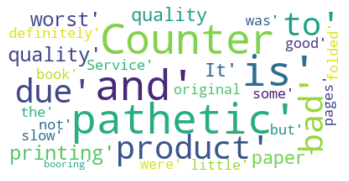

In [59]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(v_n)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [60]:
valid_pos_words=Counter(" ".join(valid_pos["review"]).split())
v_p=str(valid_pos_words)

# Positive Review-WordCloud

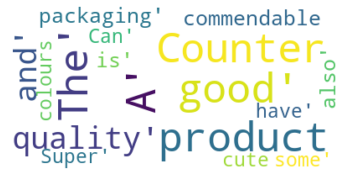

In [61]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(v_p)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()